### **Import important library**

In [8]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Step 0: Prepare data**

### **a. Load dataframe from csv file**

In [37]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

Combine train and test data for better analysis

In [38]:
train['source'] = 'train'
test['source'] = 'test'

test['Item_Outlet_Sales'] = 0.0

df = pd.concat([train, test], sort = False, ignore_index = True)

### **b. Overview data**

- **Item_Identifier**: Unique product ID
- **Item_Weight**: Weight of produt
- **Item_Fat_Content**: Whether the product is low fat or not
- **Item_Visibility**: The % of total display area of product in a store allocated to the particular product
-	**Item_Type	Item_MRP**: Maximum retail price (list price) of the product
- **Outlet_Identifier**: Unique store ID
-	**Outlet_Establishment_Year**: The year in which store was established
- **Outlet_Size**: The size of the store in terms of ground area covered
- **Outlet_Location_Type**: The type of city in which the store is located
- **Outlet_Type**: Whether the outlier is just a grocery store or some sort of supermarket
- **Item_Outlet_Sales**: Sales of the product in the particular store

In [39]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [40]:
df.shape

(14204, 13)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

# **Step 1: EDA**

In [42]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### **a. Outlier Detection**

**Outlier Value :**
1. Item_Visibility has Outlier : True with threshold -0.068654833 and 0.198167231 (Must Visualization).
 - a. Why : 
        1. Query Outlier Data (Describe ==> IQR)
        2. Visualization  (Univariate, Bivariate, MultiVariate)
 - b. Where/When : This value is having wide range from 0 to 0.3 ==> Not Affect much
 - c. What : 
          - Ignore these outlier values
          - Impute Outlier with Meadian Imputation

In [43]:
StatsDF = df.describe()

In [44]:
GoodData = df[(df['Item_Visibility'] > 0) & (df['Item_Outlet_Sales'] > 0)]
for col in StatsDF.columns:
  Q1, Q2, Q3 = StatsDF.loc['25%', col], StatsDF.loc['50%', col], StatsDF.loc['75%', col]
  MinV, MaxV = StatsDF.loc['min', col], StatsDF.loc['max', col]
  IQR = Q3 - Q1
  isOutlier = (MinV < Q1 - 1.5 * (Q3 - Q1)) or (MaxV > Q3 + 1.5 * (Q3 - Q1))
  print(f'{col} has Outlier : {isOutlier} with threshold {Q1 - 1.5 * (Q3 - Q1)} and {Q3 + 1.5 * (Q3 - Q1)}')

Item_Weight has Outlier : False with threshold -3.349999999999998 and 28.81
Item_Visibility has Outlier : True with threshold -0.07346667400000001 and 0.19453961000000003
Item_MRP has Outlier : False with threshold -43.7534 and 323.621
Outlet_Establishment_Year has Outlier : False with threshold 1961.5 and 2029.5
Item_Outlet_Sales has Outlier : True with threshold -3244.7763000000004 and 5407.960500000001


### **b. Missing Value Detection**

**Missing Value :**
 1. Item_Weight	
 - a. Why : 
        1. Query Missing Data
        2. Visualization  (Univariate, Bivariate, MultiVariate)
 - b. Where/When : 
        1. All missing data are in 1985
 - c. What : Imputation mean

 2. Outlet_Size 


In [45]:
missing_df = pd.DataFrame(index= df.columns,
                              data = {
                                        'Percent':df.isnull().sum()/df.shape[0]*100,
                                        'Total':df.isnull().sum()
                                      }
                              )
missing_df = missing_df[missing_df["Total"] > 0]
display(missing_df)

,Percent,Total
Item_Weight,17.171219,2439
Outlet_Size,28.273726,4016


In [46]:
missing_df1 = df[df["Item_Weight"].isnull()] 
display(missing_df1.head(5))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,train
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,train
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,train
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,train


In [47]:
missing_df2 = df[df["Outlet_Size"].isnull()] 
display(missing_df2.head(5))

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,train
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,train


In [48]:
missing_df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,0.0,2439.000000,2439.000000,2439.0,2439.000000
mean,NaN,0.077318,140.918552,1985.0,1489.799157
std,NaN,0.062589,61.885903,0.0,2187.687974
min,NaN,0.000000,31.290000,1985.0,0.000000
25%,NaN,0.030392,93.859400,1985.0,0.000000
50%,NaN,0.061986,142.747000,1985.0,246.346000
75%,NaN,0.110692,185.510800,1985.0,2536.365100
max,NaN,0.328391,266.588400,1985.0,13086.964800


In [49]:
missing_df2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4016.000000,4016.000000,4016.000000,4016.000000,4016.000000
mean,12.774231,0.070448,140.981393,2002.999751,1093.757705
std,4.656634,0.055236,62.202020,3.506301,1501.185486
min,4.555000,0.000000,32.055800,1998.000000,0.000000
25%,8.680000,0.029038,94.069900,2002.000000,0.000000
50%,12.500000,0.057111,142.214100,2002.000000,348.213400
75%,16.750000,0.100167,185.950950,2007.000000,1789.670400
max,21.350000,0.313935,266.888400,2007.000000,9664.752800


Item weight column has about 2439 missing values and outlet size column has 4016 NaN values

### **c. Skew Data Detection**

There is skewness present in the item visibility which need to be handled

In [50]:
df.skew()

<ipython-input-50-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Item_Weight                  0.101309
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.544684
dtype: float64

### **d. Inconsistent Detection**

**Individuals of Inconsistent Value :**
1. Item_Fat_Content
<table>
  <tr>
    <th> Low Fat: 8485 </th>
    <th> Regular: 4824 </th>
    <th> LF: 522 </th>
    <th> reg: 195 </th>
    <th> low fat: 178 </th>
  </tr>
</table>

 - a.Why : Data is collected from multiple source so it is inconsistent (Must think the solution to prevent it in the future)
 - b.Where/When : Data from Web must have contrainst 
 - c.What : 
    - Which majority value ? 
    - Assing inconsistent value to majority value

In [51]:
# Individuals
temp_df = df.copy()
temp_df["Item_Code"] = temp_df["Item_Identifier"].apply(lambda ID: ID[:3])
temp_df = temp_df.drop(["Item_Identifier", "Outlet_Identifier", 'source'], axis = 1)
temp_df.dtypes[temp_df.dtypes == "object"].keys()

for col in temp_df.dtypes[temp_df.dtypes == "object"].keys():
  print(f"***** {col} : *****")
  display(temp_df[col].value_counts())# Individuals
temp_df = df.copy()
temp_df["Item_Code"] = temp_df["Item_Identifier"].apply(lambda ID: ID[:3])
temp_df = temp_df.drop(["Item_Identifier", "Outlet_Identifier", 'source'], axis = 1)
temp_df.dtypes[temp_df.dtypes == "object"].keys()

for col in temp_df.dtypes[temp_df.dtypes == "object"].keys():
  print(f"***** {col} : *****")
  display(temp_df[col].value_counts())

***** Item_Fat_Content : *****


Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

***** Item_Type : *****


Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

***** Outlet_Size : *****


Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

***** Outlet_Location_Type : *****


Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

***** Outlet_Type : *****


Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

***** Item_Code : *****


FDT    467
FDX    460
FDW    460
FDV    454
FDU    452
      ... 
DRO     27
DRP     19
DRZ     18
DRQ      9
DRY      9
Name: Item_Code, Length: 71, dtype: int64

***** Item_Fat_Content : *****


Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

***** Item_Type : *****


Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

***** Outlet_Size : *****


Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

***** Outlet_Location_Type : *****


Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

***** Outlet_Type : *****


Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

***** Item_Code : *****


FDT    467
FDX    460
FDW    460
FDV    454
FDU    452
      ... 
DRO     27
DRP     19
DRZ     18
DRQ      9
DRY      9
Name: Item_Code, Length: 71, dtype: int64

##### **Check follow Item_Identifier**

In [52]:
# Combination
# Fixed Feature: Item_Identifier
df[['Item_Identifier', 'Item_Fat_Content', 'Item_Type']].groupby(by=['Item_Identifier']).nunique() #---> Inconsistent( Item_Fat_Content > 1)

,Item_Fat_Content,Item_Type
Item_Identifier,,
DRA12,2,1
DRA24,1,1
DRA59,2,1
DRB01,2,1
DRB13,1,1
...,...,...
NCZ30,2,1
NCZ41,1,1
NCZ42,2,1


In [53]:
df[df['Item_Identifier'] == 'DRA12'][['Item_Fat_Content', 'Item_Identifier']] # ---> Inconsistent

,Item_Fat_Content,Item_Identifier
118,Low Fat,DRA12
1197,Low Fat,DRA12
1245,Low Fat,DRA12
1693,LF,DRA12
7467,Low Fat,DRA12
8043,Low Fat,DRA12
9023,Low Fat,DRA12
12435,Low Fat,DRA12
13604,LF,DRA12


In [54]:
df_check = df.copy()

df_check['Item_Fat_Content'].replace('reg','Regular',inplace=True)
df_check['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat',inplace=True)

In [55]:
df_group = df_check[["Item_Identifier", "Item_Fat_Content", "Item_Type"]].groupby(by = ["Item_Identifier"]).nunique()
df_group[df_group["Item_Fat_Content"] * df_group["Item_Type"] > 1]

,Item_Fat_Content,Item_Type
Item_Identifier,,


##### **Check follow Outlet_Identifier**

In [56]:
df_check = df.copy()
featureList = ["Outlet_Identifier", "Outlet_Establishment_Year",	"Outlet_Size",	"Outlet_Location_Type",	"Outlet_Type"]
df_group = df_check[featureList].groupby(by = ["Outlet_Identifier"]).nunique()
df_group[df_group["Outlet_Establishment_Year"] * df_group["Outlet_Size"] 
         * df_group["Outlet_Location_Type"] *  df_group["Outlet_Type"] > 1]

,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Outlet_Identifier,,,,



# **Step 2: Visualize Data**

### **1. Univariate Analysis**

##### **a. Categorical features**

In [57]:
#Lets separate categorical features first
# cat=[feature for feature in df.columns if df[feature].nunique()<20 and feature!='source']
# cat

cat = [feature for feature in df.columns if df[feature].dtypes == 'object' and feature != 'source']
cat

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

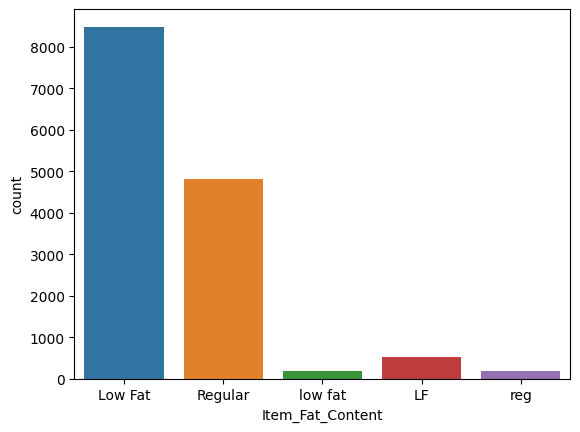

In [67]:
sns.countplot(x = df['Item_Fat_Content'])

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

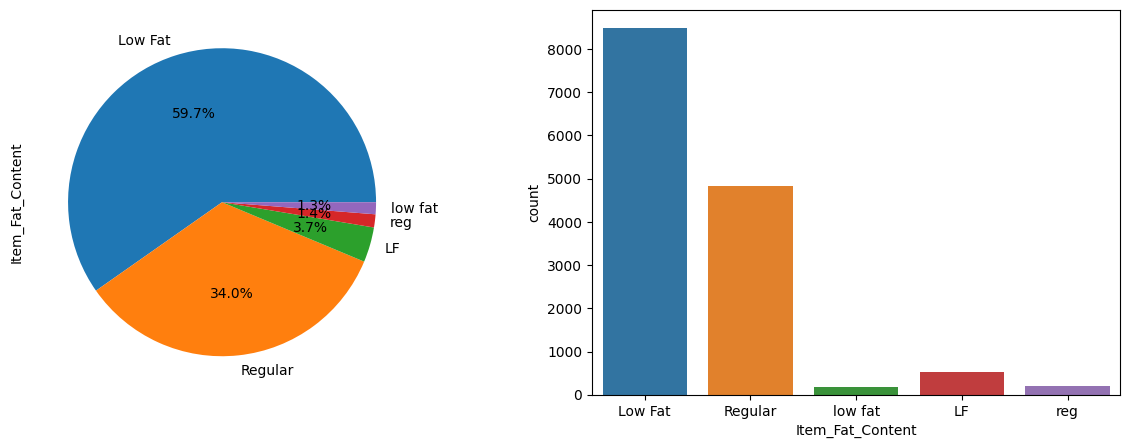

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Item_Fat_Content'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x = df['Item_Fat_Content'])
df['Item_Fat_Content'].value_counts()

Different low fat categories need to be merged. Same must be done with regular categories. Low Fat products are much more than Regular products.

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

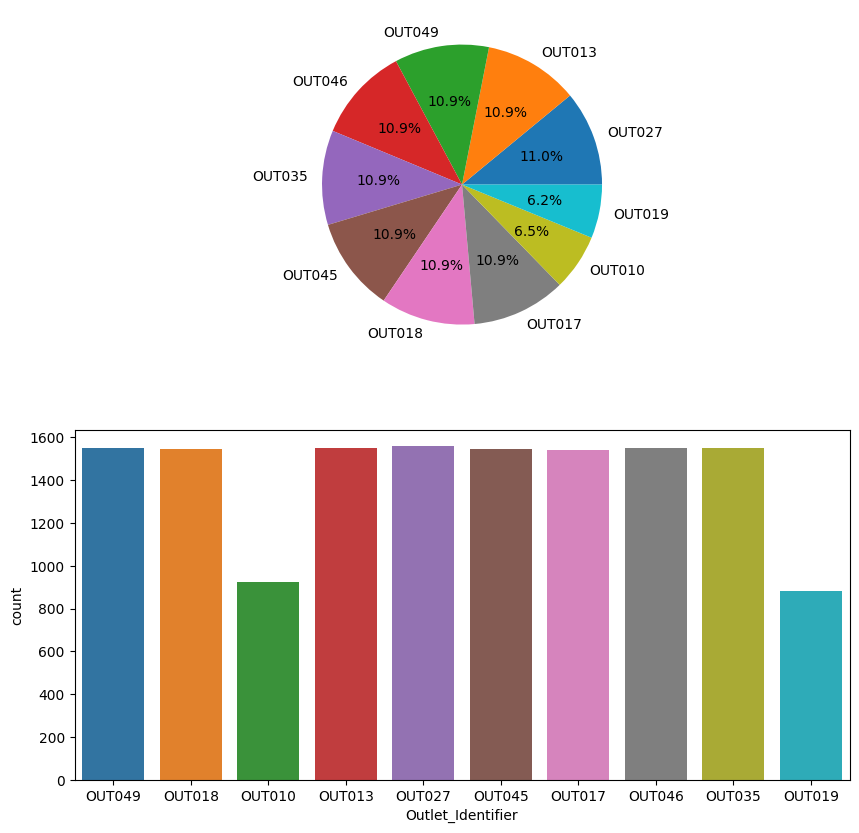

In [69]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
df['Outlet_Identifier'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x = df['Outlet_Identifier'])
df['Outlet_Identifier'].value_counts()

There are 10 outlets which are almost balanced except for two outlets

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

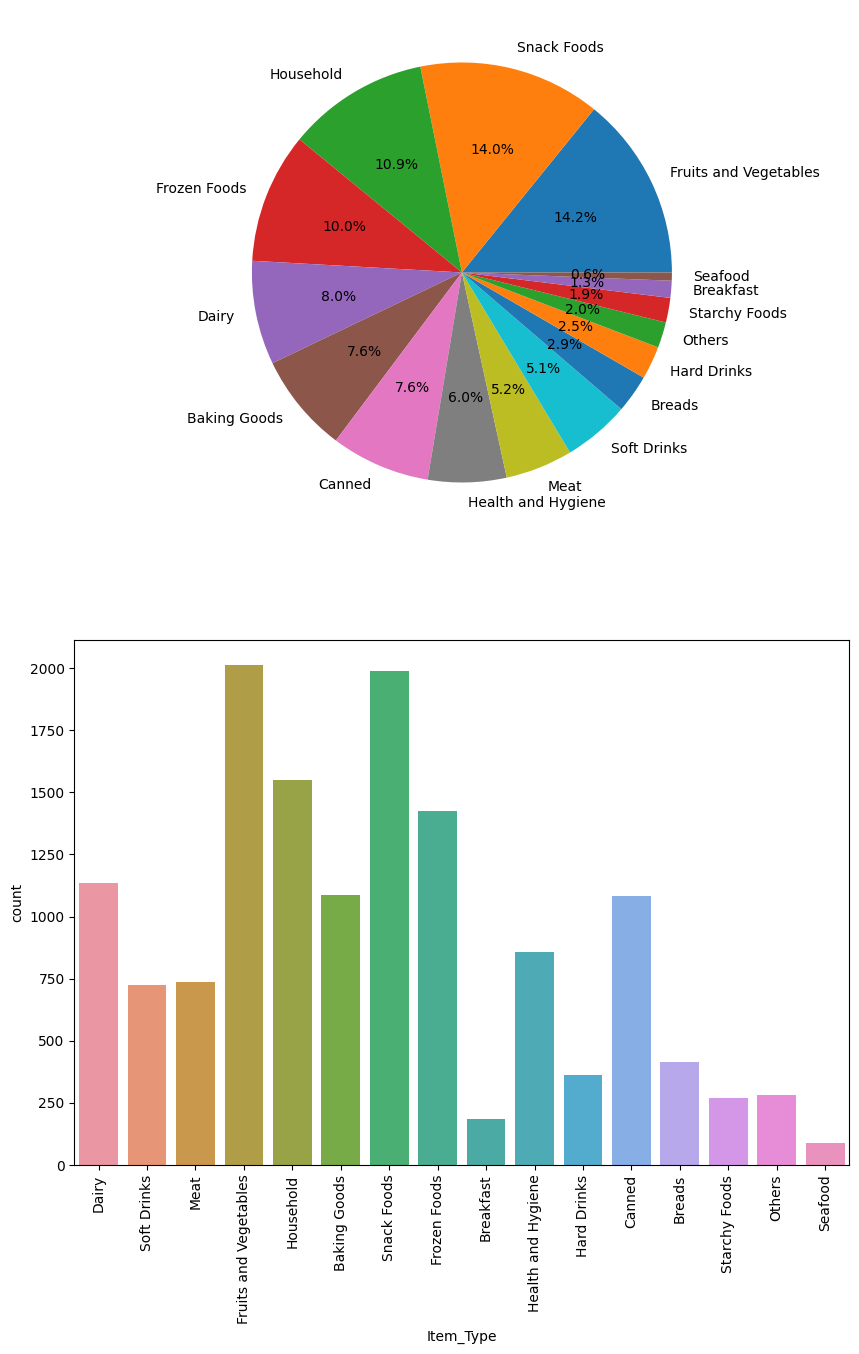

In [70]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
df['Item_Type'].value_counts().plot.pie(autopct='%1.1f%%',textprops={'fontsize':10})
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x = df['Item_Type'])
plt.xticks(rotation = 90)
df['Item_Type'].value_counts()

Fruits and Vegetables and Snack Foods are the two categories in which most of the items fall whereas Seafood is the least

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

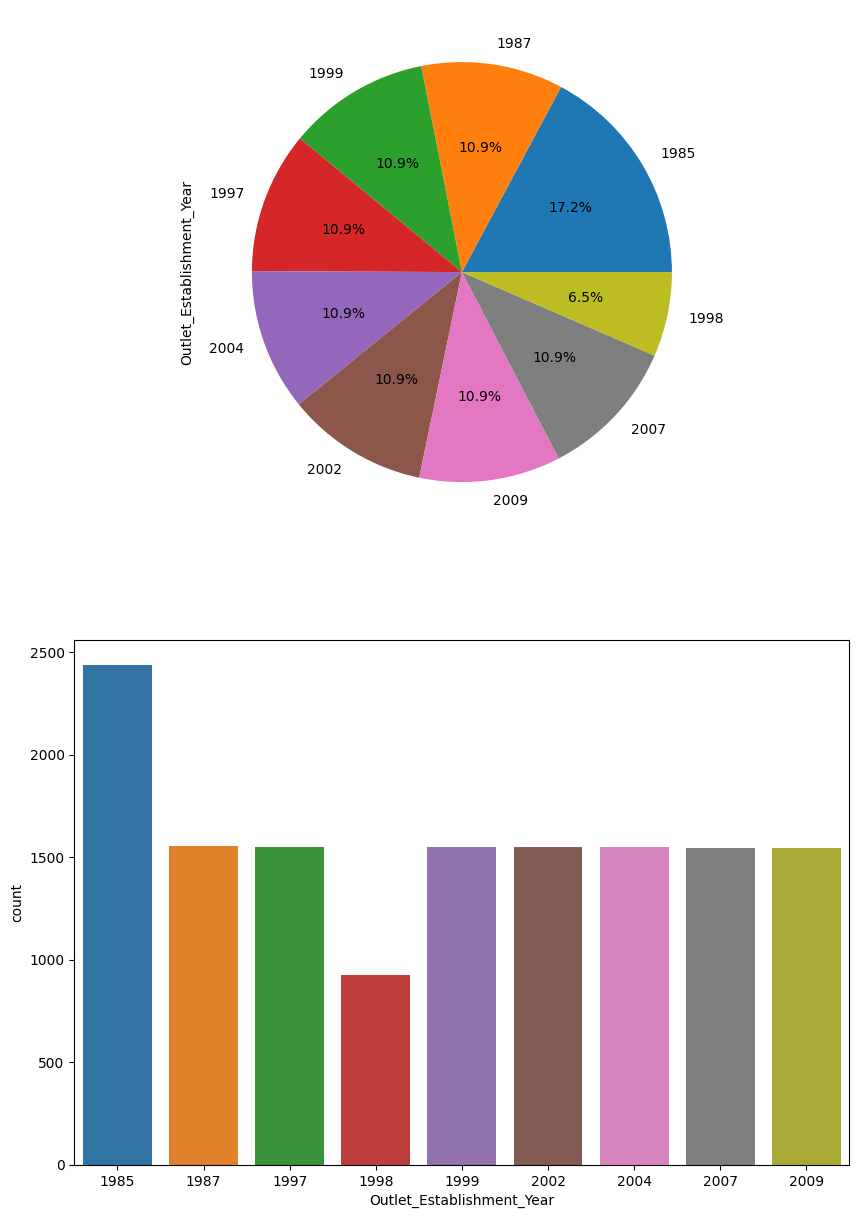

In [71]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
df['Outlet_Establishment_Year'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(2,1,2)
sns.countplot(x = df['Outlet_Establishment_Year'])
df['Outlet_Establishment_Year'].value_counts()

Most outlets were opened in 1985 and least in 1998

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

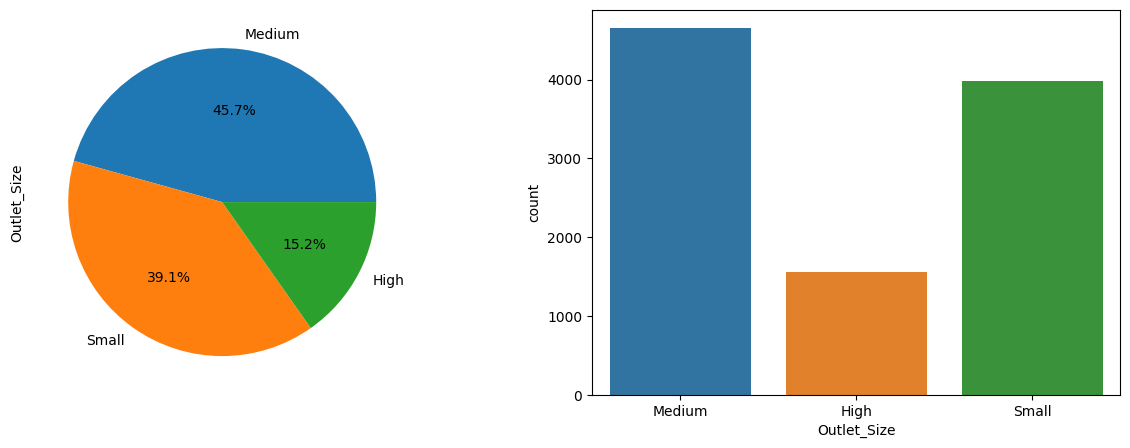

In [72]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Outlet_Size'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x = df['Outlet_Size'])
df['Outlet_Size'].value_counts()

There are few outlets with high size. most of the outlets are of medium size.

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

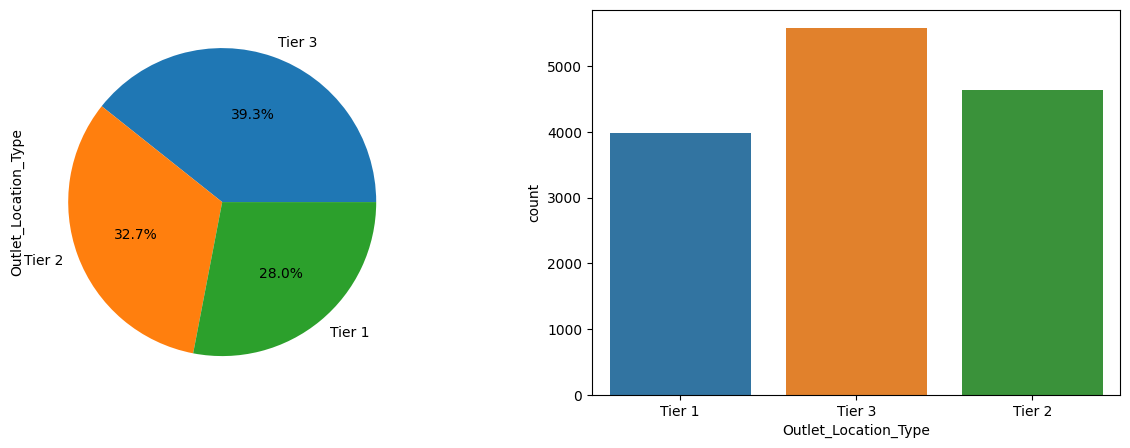

In [73]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Outlet_Location_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x = df['Outlet_Location_Type'])
df['Outlet_Location_Type'].value_counts()

Most of the stores are located in tier 2 cities/

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

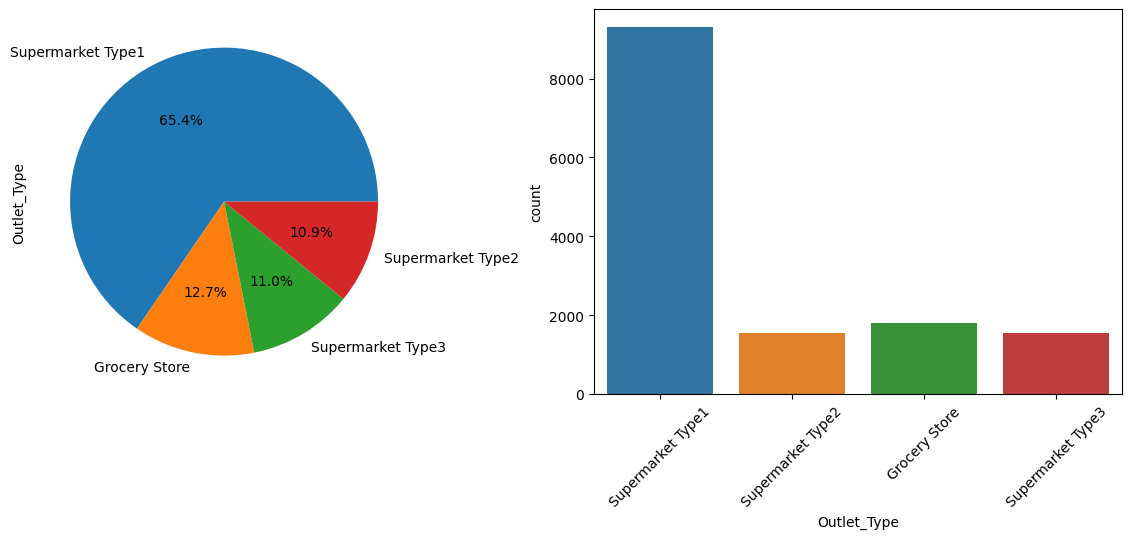

In [74]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Outlet_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x = df['Outlet_Type'])
plt.xticks(rotation=45)
df['Outlet_Type'].value_counts()

65% of the outlets are of supermarket type 1

##### **b. Numerical Features**

In [75]:
#Separating the continuous feature
# cont=[feature for feature in df.columns if df[feature].nunique()>20 and feature!='Item_Identifier' and feature!='Item_Outlet_Sales']
# cont


cont = [feature for feature in df.columns if df[feature].dtypes != 'object']
cont

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

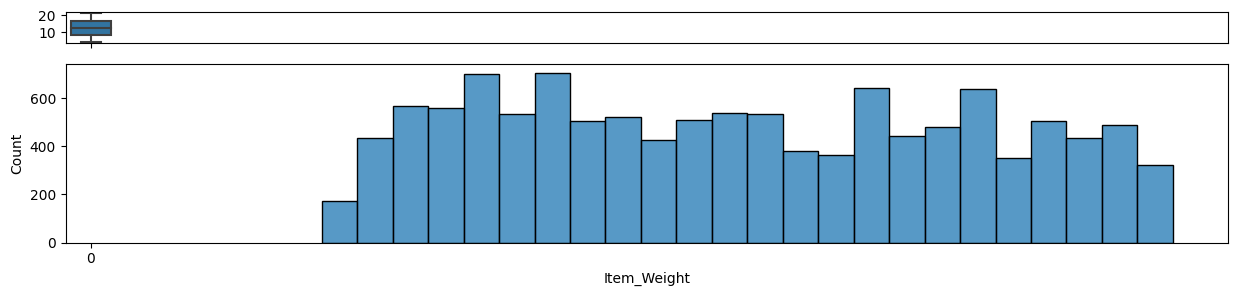

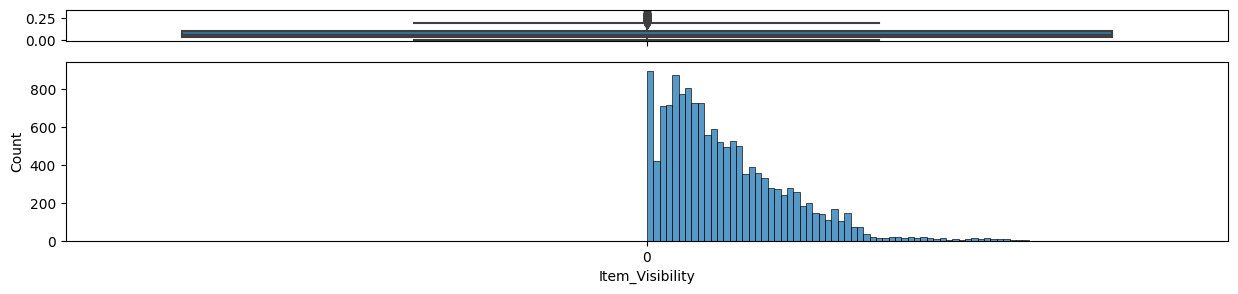

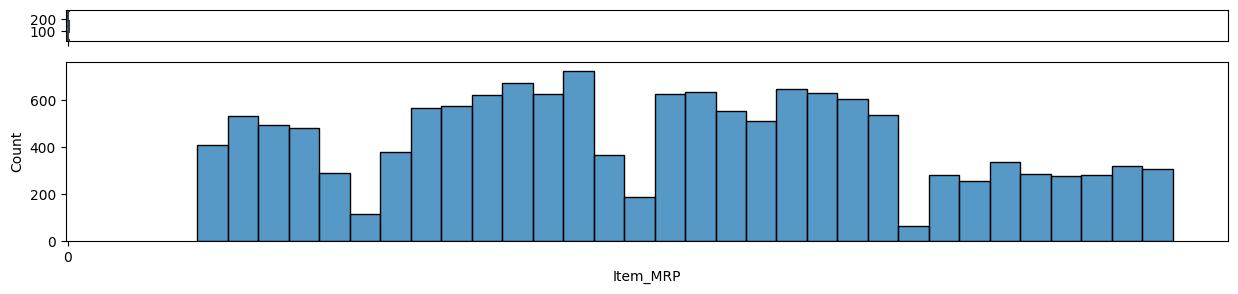

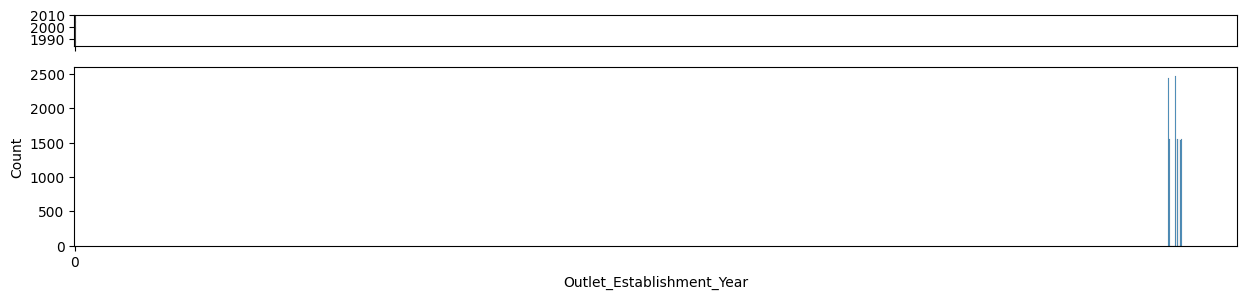

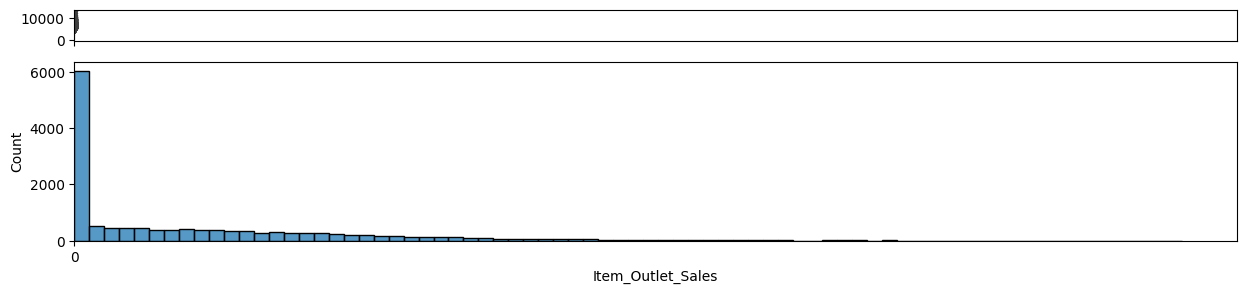

In [76]:
for feature in cont:
  f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw={'height_ratios': (.15, .85)})
  f.set_figheight(3)
  f.set_figwidth(15)
  sns.boxplot(df[feature], ax = ax_box)
  sns.histplot(data = df, x = feature, ax = ax_hist)
  plt.show()

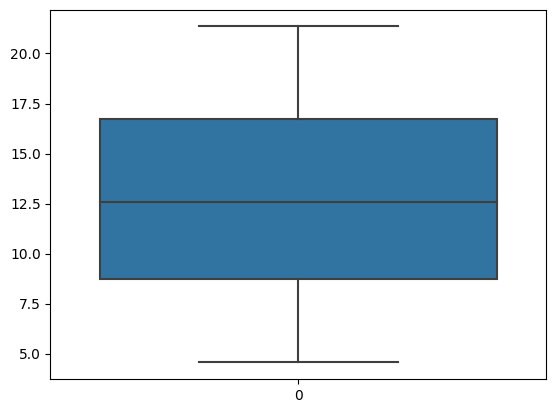

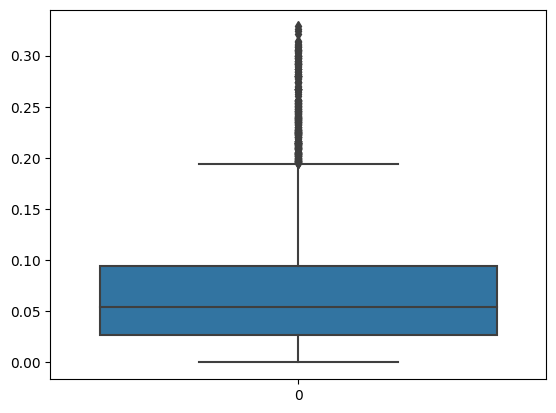

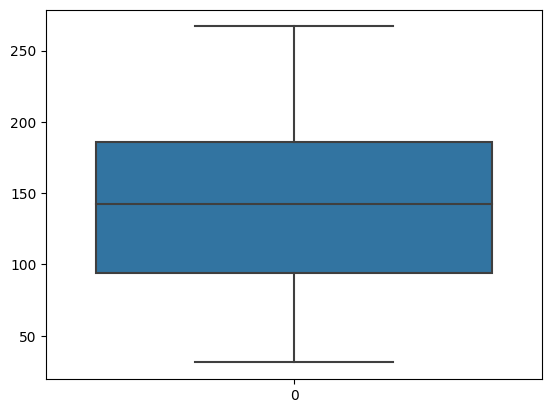

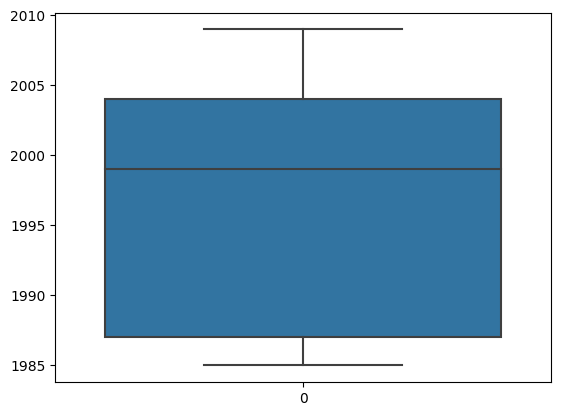

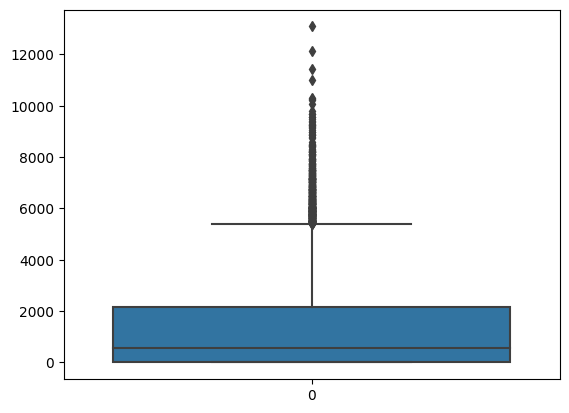

<Figure size 640x480 with 0 Axes>

In [77]:
for feat in cont:
    sns.boxplot(df[feat])
    plt.figure()

Only Item Visibility has large no. of outliers

<ipython-input-78-28da89ad691c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat])
<ipython-input-78-28da89ad691c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat])
<ipython-input-78-28da89ad691c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seabo

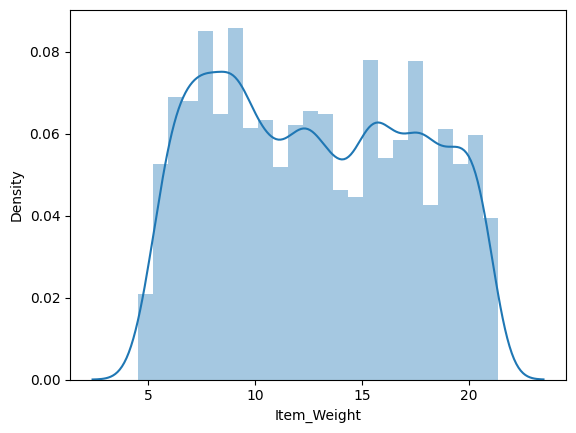

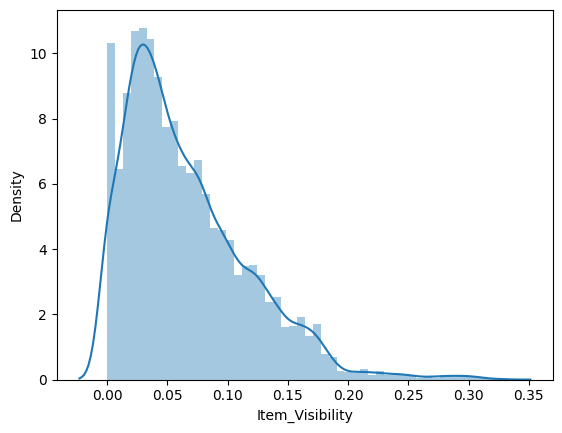

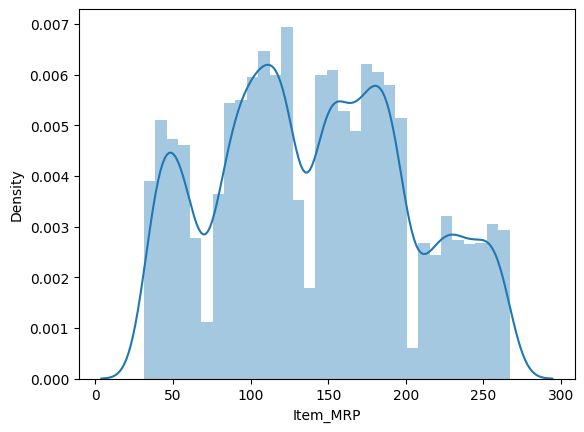

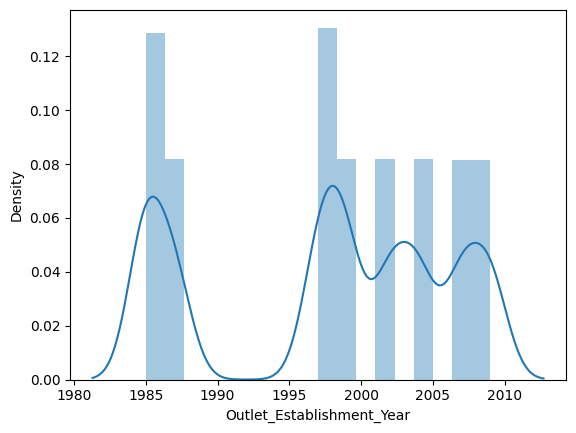

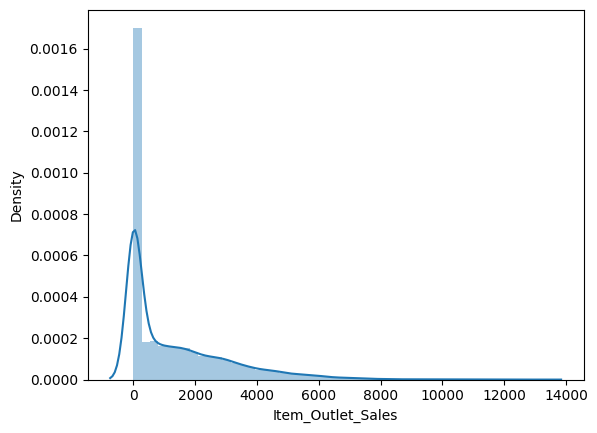

<Figure size 640x480 with 0 Axes>

In [78]:
for feat in cont:
    sns.distplot(df[feat])
    plt.figure()

Only Item visibility is skewed to the right while others almost follow the gaussian distribution.

### **2. Bivariate Analysis**



<Axes: xlabel='Outlet_Location_Type', ylabel='Outlet_Type'>

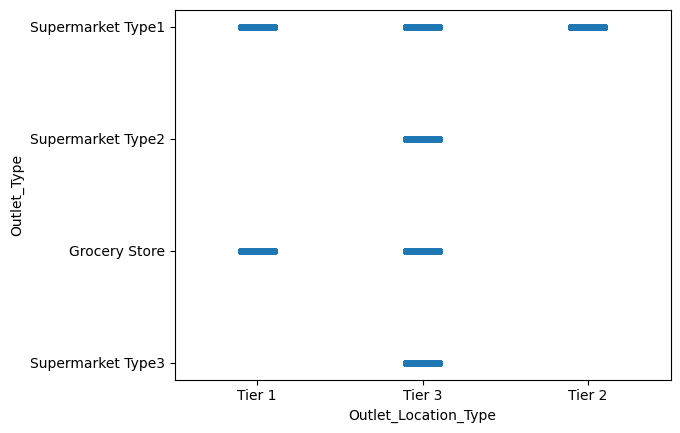

In [83]:
sns.stripplot(x = df['Outlet_Location_Type'], y = df['Outlet_Type'])

Tier 3 cities have only Superkarket type 1 whereas Tier 1 cities have only supermarket 1 and grocery strores

<Axes: xlabel='Outlet_Size', ylabel='Outlet_Type'>

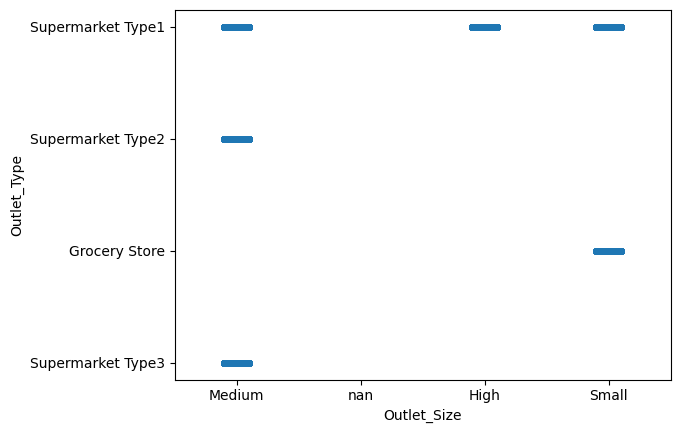

In [84]:
sns.stripplot(x = df['Outlet_Size'],y = df['Outlet_Type'])

Supermarket type 1 are of all sizes whereas grocery stores are only small and Supermarket type 2, Supermarket type 3 are of medium size only.

<Axes: xlabel='Outlet_Size', ylabel='Outlet_Location_Type'>

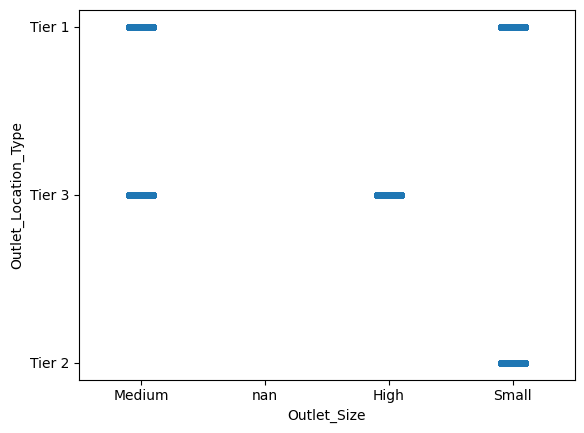

In [85]:
sns.stripplot(x = df['Outlet_Size'], y = df['Outlet_Location_Type'])

Tier 2 citis have only small outlet size and high outlet size is only found in tier 3 cities

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Outlet_Type'>

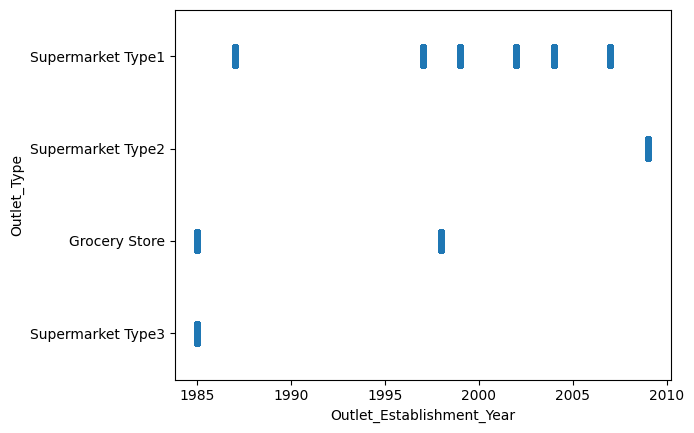

In [86]:
sns.stripplot(x = df['Outlet_Establishment_Year'], y = df['Outlet_Type'])

Supermarket type 2 was build much later while grocery stores and supermarket are the oldest outlet type.

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Outlet_Location_Type'>

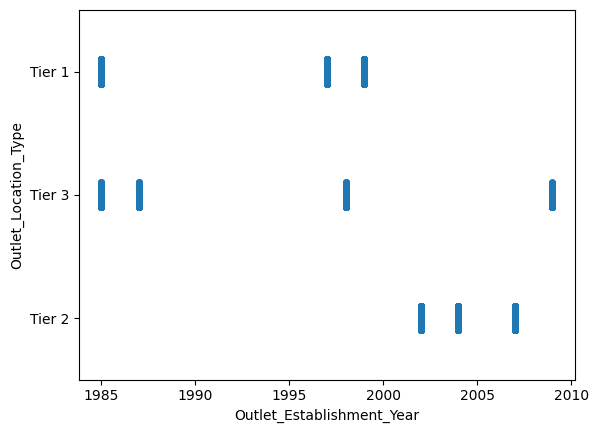

In [87]:
sns.stripplot(x = df['Outlet_Establishment_Year'], y = df['Outlet_Location_Type'])

In Tier1 and tier2 cities outlets were established in 1985 whereas tier2 got outlets after 2000

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Outlet_Size'>

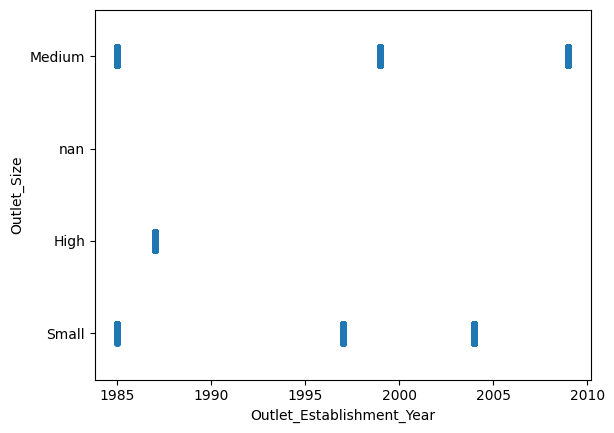

In [88]:
sns.stripplot(x = df['Outlet_Establishment_Year'], y = df['Outlet_Size'])

After 1990 no outlet of high size was established.

<Axes: xlabel='Outlet_Identifier', ylabel='Outlet_Type'>

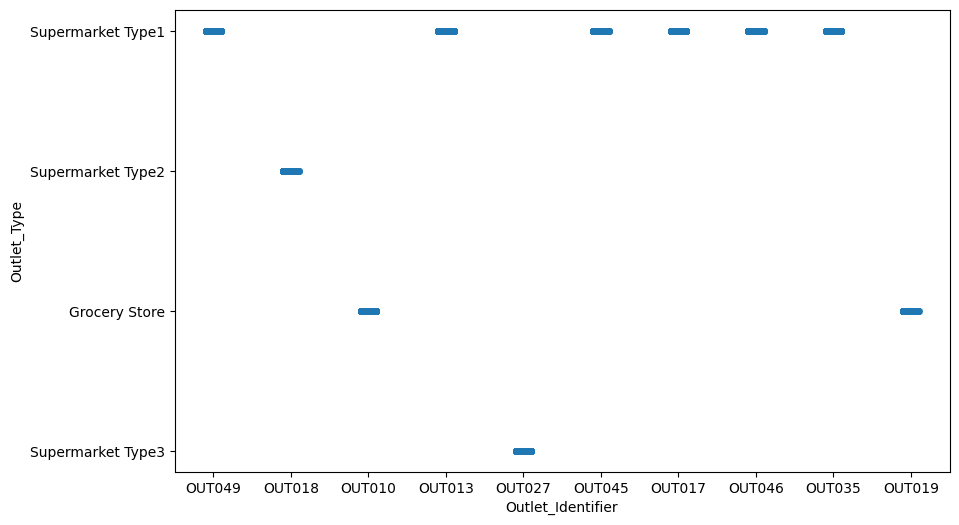

In [89]:
plt.figure(figsize=(10,6))
sns.stripplot(x = df['Outlet_Identifier'], y = df['Outlet_Type'])

There is only one oulat identifier for supermarket 2 and 3 while most of the outlet identifiers belong to supermarket1

<Axes: xlabel='Outlet_Identifier', ylabel='Outlet_Location_Type'>

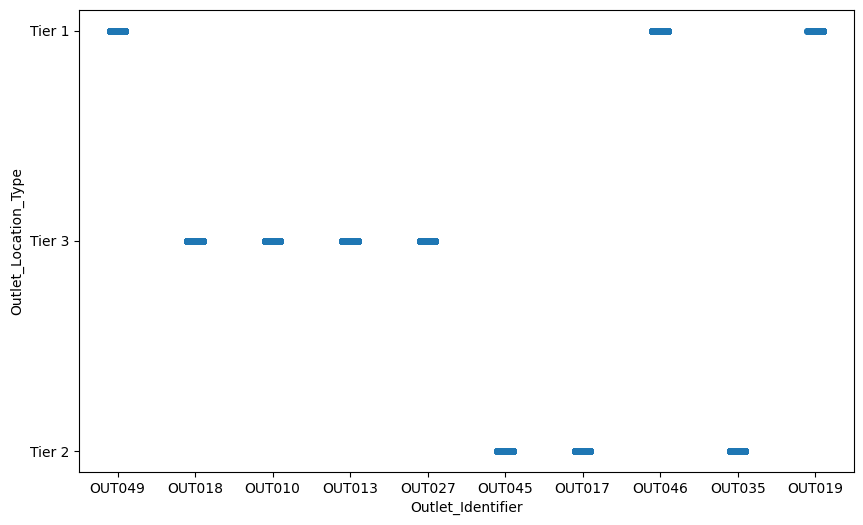

In [90]:
plt.figure(figsize=(10,6))
sns.stripplot(x = df['Outlet_Identifier'], y = df['Outlet_Location_Type'])

Tier 3 has the most diff types of outlets, but they are almost balanced.

<Axes: xlabel='Outlet_Size', ylabel='Outlet_Identifier'>

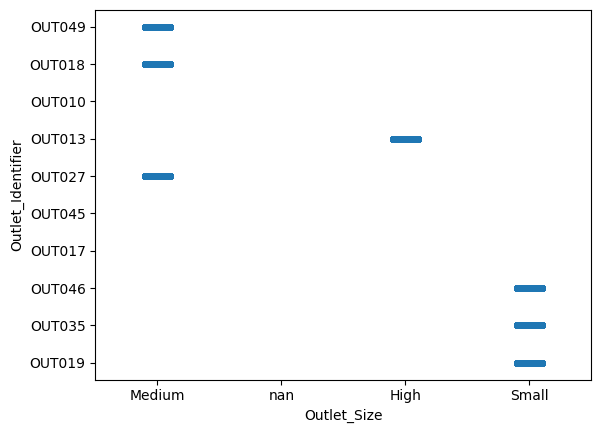

In [91]:
sns.stripplot(x = df['Outlet_Size'], y = df['Outlet_Identifier'])

There is only Outlet13 with high outlet size while medium and small of outlets each have 3 outlet identifiers. 

<Axes: xlabel='Outlet_Identifier', ylabel='Outlet_Establishment_Year'>

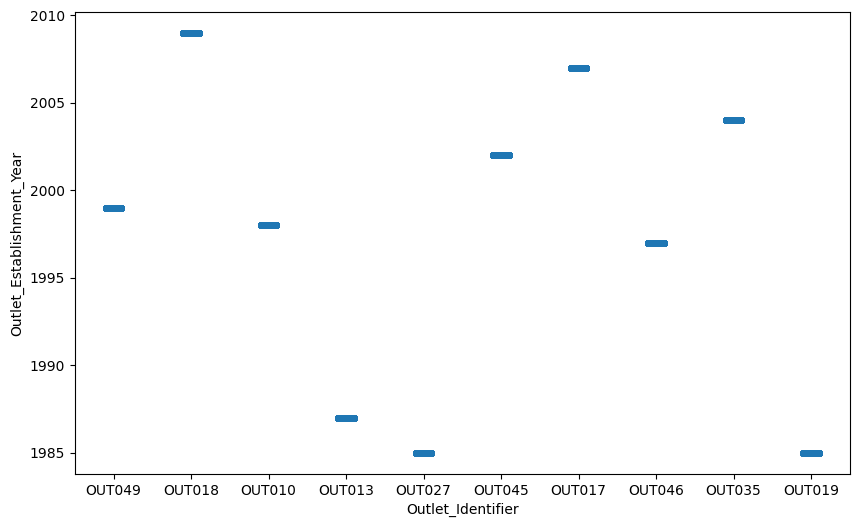

In [92]:
plt.figure(figsize=(10,6))
sns.stripplot(x = df['Outlet_Identifier'], y = df['Outlet_Establishment_Year'])

Outlet 27 and 19 are the oldest outlet identifier and outlet 18  is the newest, outlet no. does not hold any order towards year of establishment. 

<Axes: xlabel='Outlet_Identifier', ylabel='Item_Visibility'>

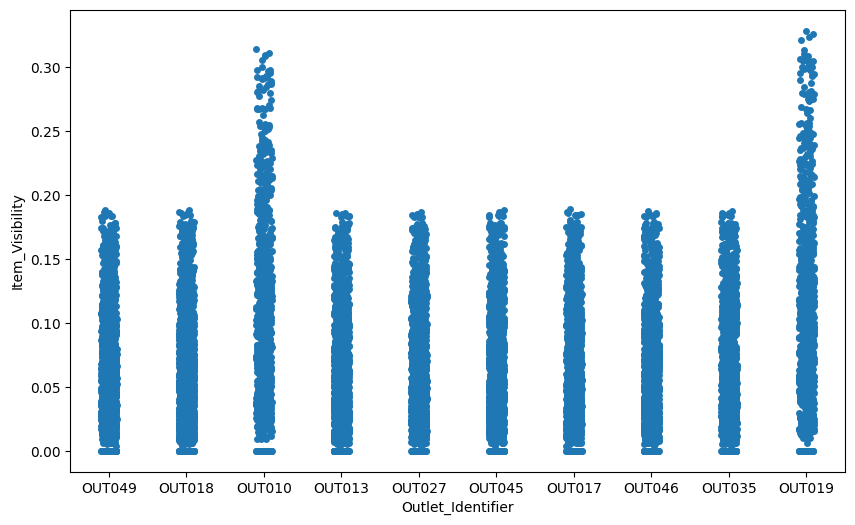

In [93]:
plt.figure(figsize=(10,6))
sns.stripplot(x = df['Outlet_Identifier'],y = df['Item_Visibility'])

Outlet 10 and 19 have give the highest visibilty to products. Other outlets provide almost equal visibility.

<Axes: xlabel='Outlet_Type', ylabel='Item_Visibility'>

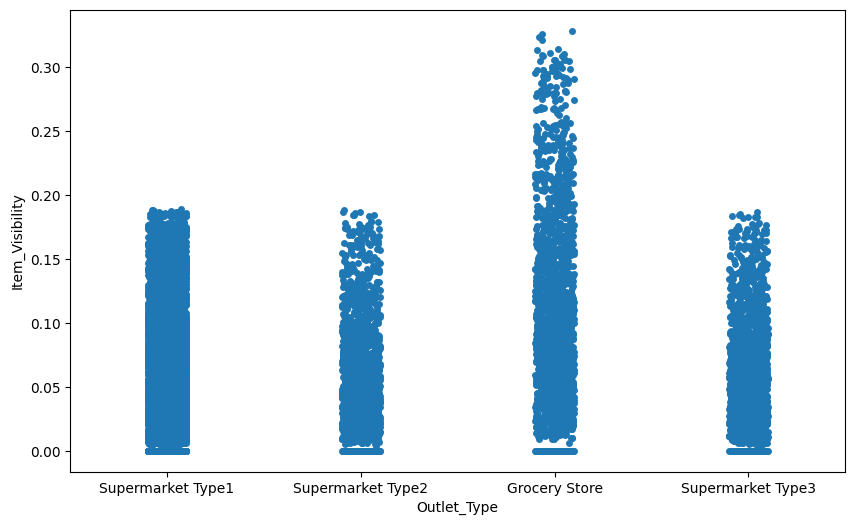

In [94]:
plt.figure(figsize=(10,6))
sns.stripplot(x = df['Outlet_Type'], y= df['Item_Visibility'])

Products are most visible in grocery stores rather than any other super markets

<Axes: xlabel='Outlet_Size', ylabel='Item_Visibility'>

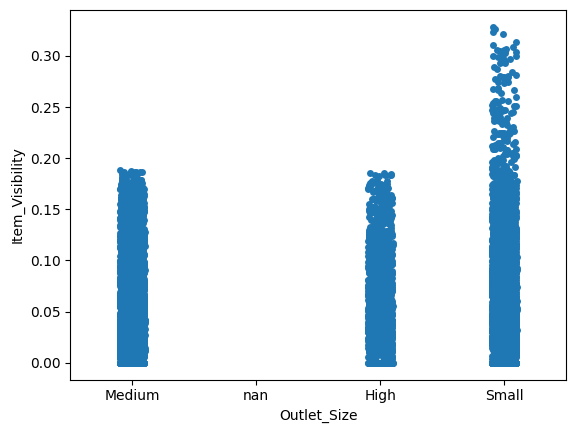

In [96]:
sns.stripplot(x = df['Outlet_Size'], y = df['Item_Visibility'])

Smallest Stores provide the most visibility to products

There are less products with high visibility. There seem to exist no correlation between the above continuous features

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

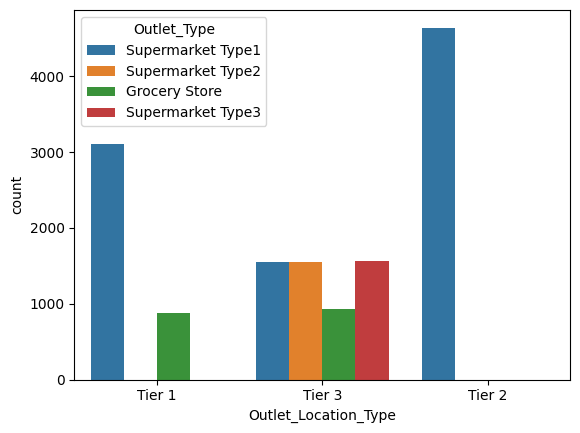

In [98]:
sns.countplot(x = df['Outlet_Location_Type'],hue=df['Outlet_Type'])

Tier 2 cities have the highest no. of supermarket 2 and donot habe any other type of outlet whereas tier 3 cities have all the types of outlets with less no. of each of them.

<Axes: xlabel='Outlet_Size', ylabel='count'>

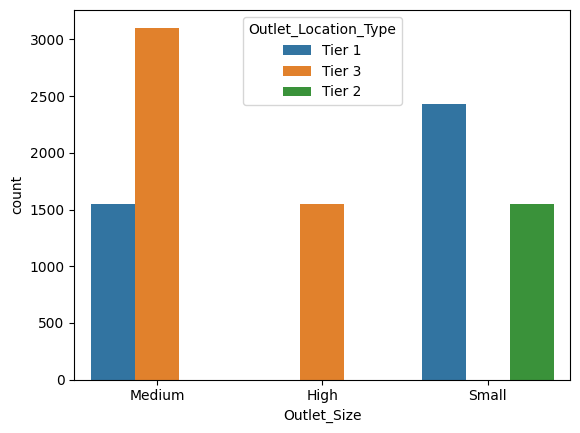

In [99]:
sns.countplot(x = df['Outlet_Size'],hue=df['Outlet_Location_Type'])

Tier 3 cities have the highest no. of medioum size outlet and tier 1 cities have highest no. small size outlets.Tier 3 cities have the least no. of stores

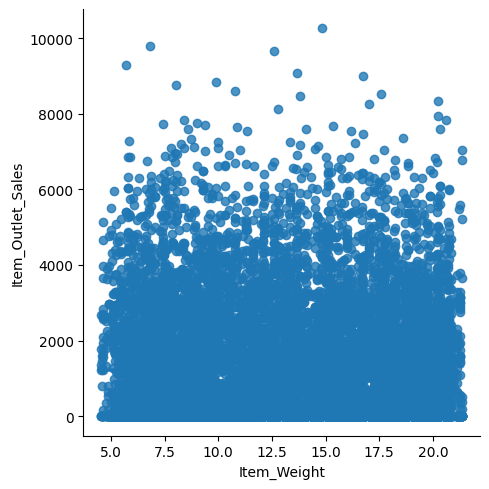

In [100]:
sns.lmplot(x='Item_Weight',y='Item_Outlet_Sales',data=df)

There is no relation between item weight and item outlet sales.

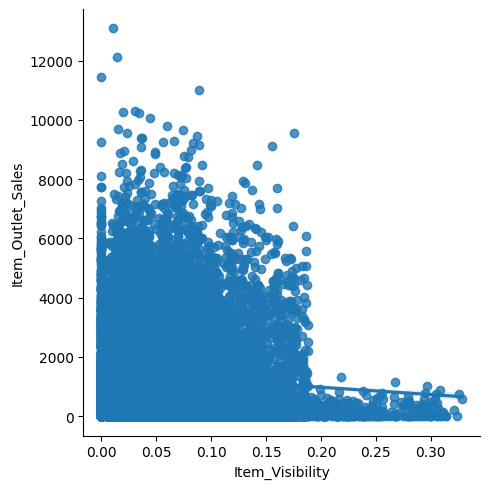

In [101]:
sns.lmplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)

Ttem outlet sales sharply decreases for the most visible items

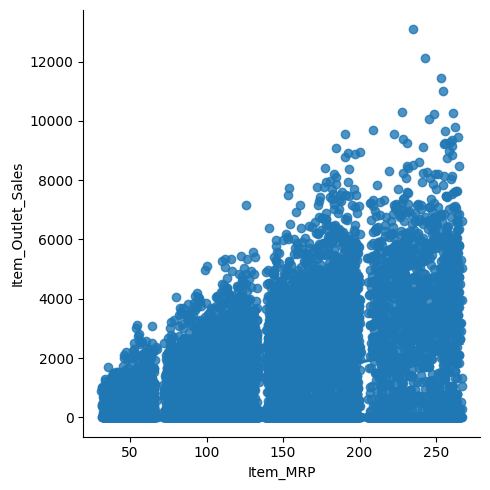

In [102]:
sns.lmplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)

As the mrp of an item increases item outlet sales also increases

There is not much relation between fat content and item outlet sales. Seafoord, Vegetables and fruits contribute towards the item outlet sales. Medium size outlets and Supermarket 3 gives the most item outlet sales. Tier 1 cities donot produce least` item outlet sales compared to other types of cities.

### **3. Multivariate Analysis**

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

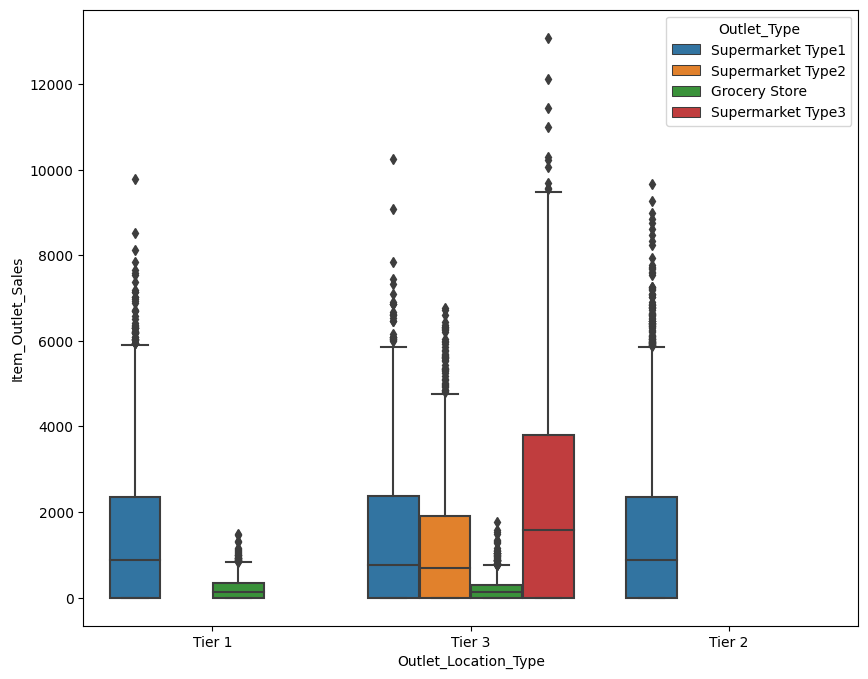

In [104]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Outlet_Location_Type',y = 'Item_Outlet_Sales',hue='Outlet_Type',data=df)

Tier 3 locations have the most sales. It can also be seen that they have most type of outlets, hence more sales

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

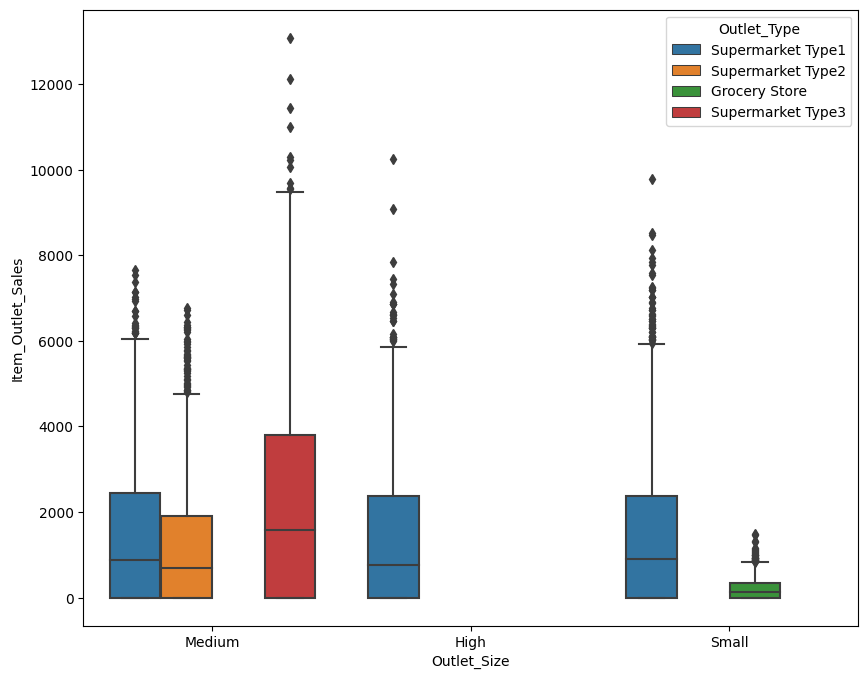

In [105]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales',hue='Outlet_Type',data=df)

It can be seen that medium size outlets sell the most and also they have the most type of ooutlets hence the sales increases even more

<ipython-input-106-2ba58099d8fd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

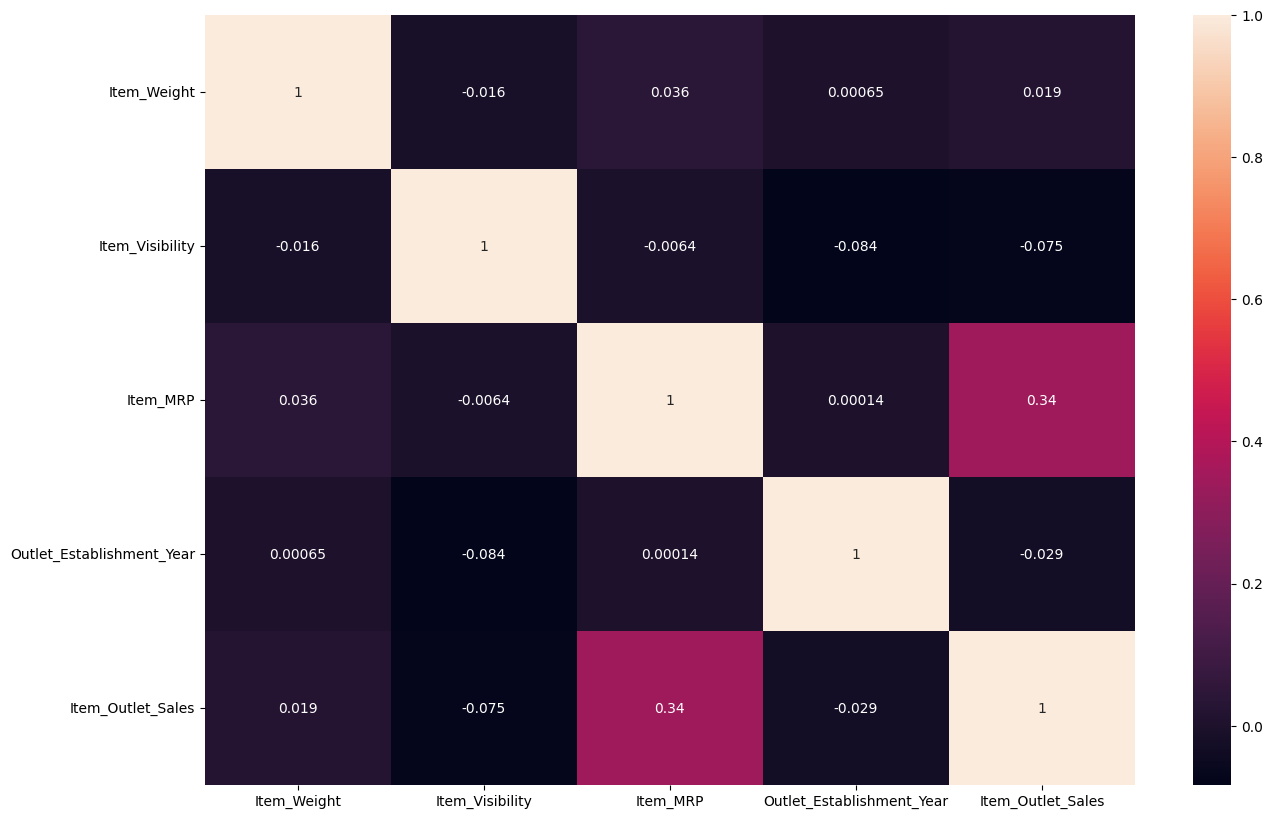

In [106]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

MRP has the strongest positive correlation with Sales, while cisibility and establishment show a little negative correlation. There is not much correlation between the independent features.

# **Step 3: Data Preprocessing**

In [107]:
data = df.copy()

### **1. Handle Outliers**

Assign all outliers to NaN values

In [108]:
display(data.describe())
GoodData = data[(data['Item_Visibility'] > 0) & (data['Item_Outlet_Sales'] > 0)]

for col in StatsDF.columns:
  Q1, Q2, Q3 = StatsDF.loc['25%', col], StatsDF.loc['50%', col], StatsDF.loc['75%', col]
  MinV, MaxV = StatsDF.loc['min', col], StatsDF.loc['max', col]
  IQR = Q3 - Q1
  isOutlier = (MinV < Q1 - 1.5 * (Q3 - Q1)) or (MaxV > Q3 + 1.5 * (Q3 - Q1))
  print(f'{col} has Outlier : {isOutlier} with threshold {Q1 - 1.5 * (Q3 - Q1)} and {Q3 + 1.5 * (Q3 - Q1)}')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Item_Weight has Outlier : False with threshold -3.349999999999998 and 28.81
Item_Visibility has Outlier : True with threshold -0.07346667400000001 and 0.19453961000000003
Item_MRP has Outlier : False with threshold -43.7534 and 323.621
Outlet_Establishment_Year has Outlier : False with threshold 1961.5 and 2029.5
Item_Outlet_Sales has Outlier : True with threshold -3244.7763000000004 and 5407.960500000001


In [109]:
col = 'Item_Visibility'
Q1, Q2, Q3 = StatsDF.loc['25%', col], StatsDF.loc['50%', col], StatsDF.loc['75%', col]
MinV, MaxV = StatsDF.loc['min', col], StatsDF.loc['max', col]
IQR = Q3 - Q1

IndexPos = data[(data[col] < (Q1 - 3 * (Q3 - Q1))) | (data[col] > (Q3 + 3 * (Q3 - Q1)))].index
data.loc[IndexPos, col] = np.nan

### **2. Handle Missing Values**

##### **a. Item_Visibility**

As seen earlier visibilty has 0 values which is not possible as a product will have some visibility in marts

In [110]:
#Replacing o visibility with nan values
data['Item_Visibility'].replace(0,np.nan,inplace=True)
data['Item_Visibility'].min()

0.003574698

(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Small')])

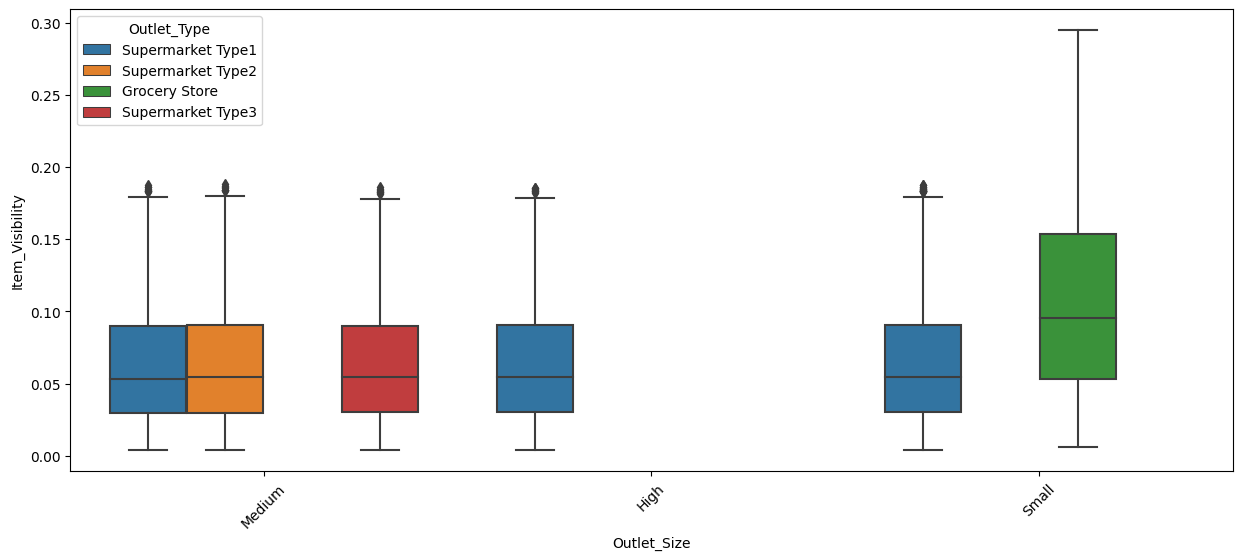

In [111]:
#Checking visibility in Outlet size with Outlet type
plt.figure(figsize=(15,6))
sns.boxplot(data=data, x='Outlet_Size', y='Item_Visibility', hue='Outlet_Type')
plt.xticks(rotation=45)

Here visibility contains missing values

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

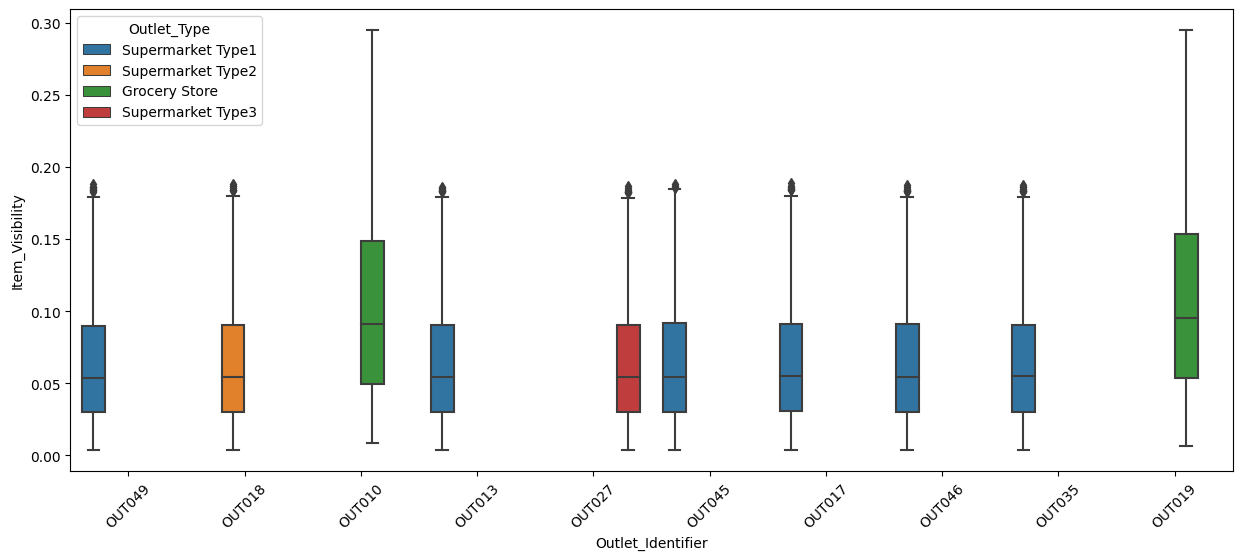

In [112]:
#Checking visibility in Outlet identifier with Outlet type
plt.figure(figsize=(15,6))
sns.boxplot(data=data, x='Outlet_Identifier', y='Item_Visibility', hue='Outlet_Type')
plt.xticks(rotation=45)

This also contain missing values 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

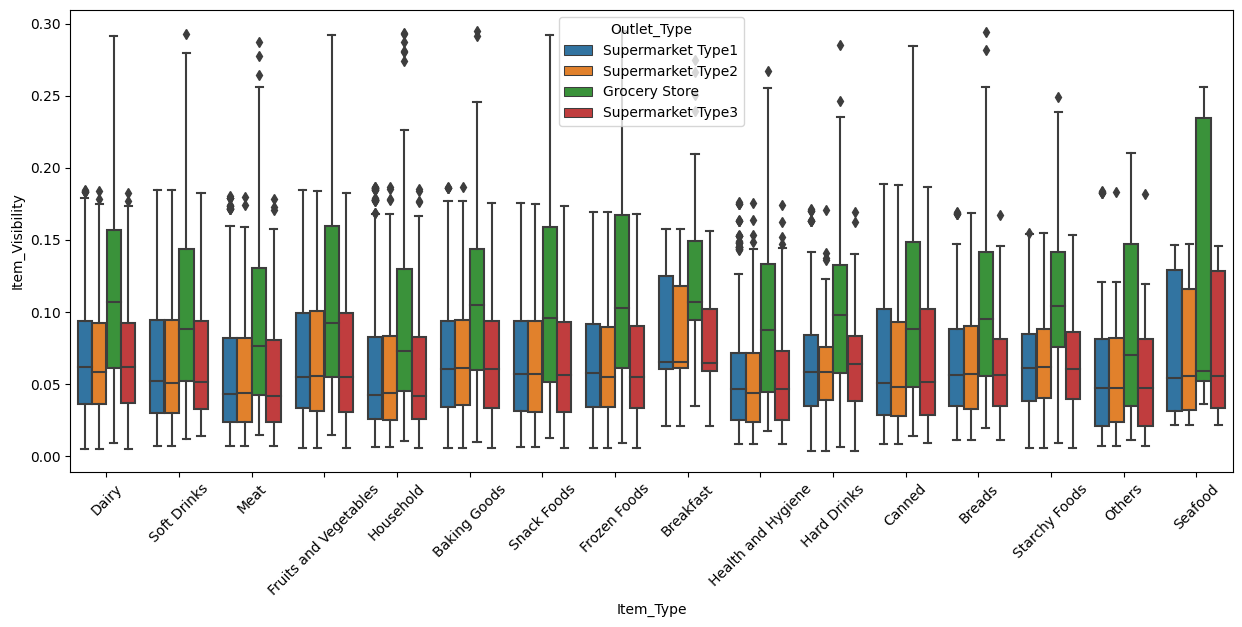

In [113]:
#Checking visibility in Item type with Outlet type
plt.figure(figsize=(15,6))
sns.boxplot(data=data, x='Item_Type', y='Item_Visibility', hue='Outlet_Type')
plt.xticks(rotation=45)

Here thee are no missing values for missing visibility hence this can be used to fill nan values in visibility column

In [114]:
#Creating pivot table to help fill nan values of visibility from here
table = data.pivot_table(values='Item_Visibility', index='Item_Type', columns='Outlet_Type', aggfunc='mean')
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.113335,0.066692,0.068206,0.066524
Breads,0.111612,0.067579,0.067976,0.066038
Breakfast,0.126056,0.079993,0.083079,0.078609
Canned,0.105889,0.066167,0.064655,0.067549
Dairy,0.116655,0.069299,0.069000,0.069213
Frozen Foods,0.115895,0.065449,0.064184,0.064816
Fruits and Vegetables,0.110803,0.067123,0.067503,0.066758
Hard Drinks,0.105321,0.064873,0.063611,0.065297
Health and Hygiene,0.098924,0.055021,0.053081,0.054924


In [115]:
# replace the nan values
# define function that returns the mean values
def find_mean(x):
    return table.loc[x['Item_Type'], x['Outlet_Type']]

# replace missing values in visibility with mean values from above pivot table
data['Item_Visibility'].fillna(data[data['Item_Visibility'].isnull()].apply(find_mean, axis=1), inplace=True)

##### **b. Item_Weight**

In [116]:
wt_table = data.pivot_table(values='Item_Weight', index='Item_Identifier')
wt_table

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [117]:
missing_df = df[df["Item_Weight"].isnull()] 
wt_table = df.pivot_table(values='Item_Weight', index='Item_Identifier')
display(wt_table.head())

PosImpNaN = data[data["Item_Weight"].isnull()].apply(lambda datarow : wt_table.loc[datarow["Item_Identifier"], "Item_Weight"], axis = 1)
data['Item_Weight'].fillna(PosImpNaN, inplace = True)
missing_df = data[data["Item_Weight"].isnull()] 
missing_df

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source


##### **c. Outlet_Size**

In [118]:
data['Outlet_Size'].replace(np.NaN,'Unknown',inplace=True)

In [119]:
from scipy.stats import mode

In [120]:
size_table = data.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
size_table

<ipython-input-120-152450a7e528>:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  size_table = data.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))


,Outlet_Size
Outlet_Type,
Grocery Store,Unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


Grocery stores are usually smaller than super markets so we will replace NaN values by small

In [121]:
#Filling nan values with mode
data['Outlet_Size'].replace('Unknown','Small',inplace=True)

In [122]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

No null values remain

### **3. Handle Skew Data**

1.1730761893269448


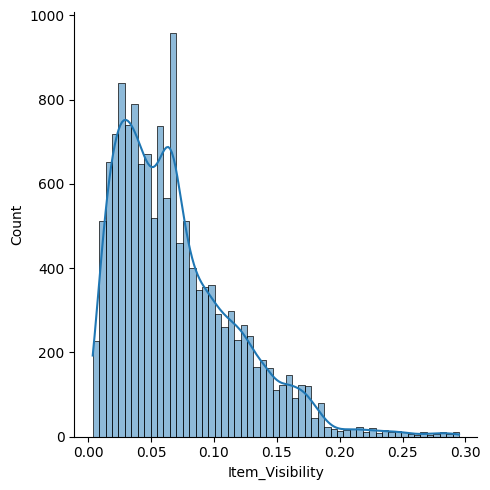

In [123]:
print(data['Item_Visibility'].skew())
sns.displot(data['Item_Visibility'], kde = True)

0.10271716819660189


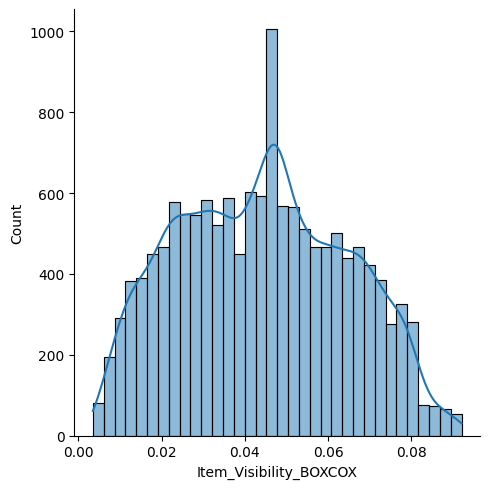

In [124]:
# Using boxcox
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
data['Item_Visibility_BOXCOX'] = boxcox1p(data['Item_Visibility'], boxcox_normmax(data['Item_Visibility'] + 1))
print(data['Item_Visibility_BOXCOX'].skew())
sns.displot(data['Item_Visibility_BOXCOX'], kde = True)

##### **d. Handle Inconsistent Data**

**Item_Identifier**

In [125]:
data['Item_Identifier_Crop'] = data['Item_Identifier'].apply(lambda item_id: item_id[:3])
data[['Item_Identifier','Item_Identifier_Crop']].head(5)

,Item_Identifier,Item_Identifier_Crop
0,FDA15,FDA
1,DRC01,DRC
2,FDN15,FDN
3,FDX07,FDX
4,NCD19,NCD


Now the item identifier column looks more meaningful so we will keep it.

**Item_Fat_Content**

In [126]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [127]:
data['Item_Fat_Content'].replace('reg','Regular',inplace=True)
data['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat',inplace=True)
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [128]:
df['Item_Fat_Content'].unique()
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

Now we have only two categories in the fat content column

# **Step 4: Feature Engineering**

### **1.  Enrich Feature**

In [129]:
data['Outlet_Age'] = 2022 - data["Outlet_Establishment_Year"]
data[['Outlet_Establishment_Year', 'Outlet_Age']]

,Outlet_Establishment_Year,Outlet_Age
0,1999,23
1,2009,13
2,1999,23
3,1998,24
4,1987,35
...,...,...
14199,1997,25
14200,2009,13
14201,2002,20
14202,2007,15


### **2. Encoding object type features**

In [130]:
#Using Ordinal Encoder for encoding object type values
from sklearn.preprocessing import OrdinalEncoder
e = OrdinalEncoder()

In [131]:
obj = [feature for feature in data.columns if data[feature].dtypes=='O' and feature!='source' and feature != 'Item_Identifier']
obj


['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Identifier_Crop']

In [132]:
for i in obj:
    data[i] = e.fit_transform(data[i].values.reshape(-1,1))

In [133]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
source                        object
Item_Visibility_BOXCOX       float64
Item_Identifier_Crop         float64
Outlet_Age                     int64
dtype: object

All columns are converted into float type except for source.

### **3. Scaling numerical data**

In [134]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()

In [135]:
SelectedItemFeatures = ["Item_Identifier_Crop", "Item_Weight", "Item_Fat_Content", "Item_Visibility_BOXCOX", "Item_Type", "Item_MRP"]
SelectedOutletFeatures = ["Outlet_Identifier", "Outlet_Age", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]
TargetFeatures = "Item_Outlet_Sales"

for col in SelectedItemFeatures:
  data[col] = m.fit_transform(data[col].values.reshape(-1,1))

for col in SelectedOutletFeatures:
  data[col] = m.fit_transform(data[col].values.reshape(-1,1))

# **Step 5: Modelling using Machine Learning**

### **1. Prepare Data**

In [136]:
from sklearn.model_selection import train_test_split,cross_val_score
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']

In [137]:
train.drop(['source', 'Item_Identifier'],axis=1,inplace=True)
test.drop(['source','Item_Outlet_Sales', 'Item_Identifier'],axis=1,inplace=True)

<ipython-input-137-cf75b78b56f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source', 'Item_Identifier'],axis=1,inplace=True)
<ipython-input-137-cf75b78b56f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['source','Item_Outlet_Sales', 'Item_Identifier'],axis=1,inplace=True)


In [138]:
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)

### **2. Model Selection**

In [139]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [140]:
ItemFeatures = ['Item_Identifier_Crop', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Item_Visibility_BOXCOX']
OutletFeatures = ['Outlet_Identifier','Outlet_Age', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Targets = 'Item_Outlet_Sales'
X = train[ItemFeatures + OutletFeatures].values
y = train[Targets].values


In [141]:
models=[KNeighborsRegressor(),LinearRegression(),Lasso(),Ridge(),ElasticNet(),DecisionTreeRegressor(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]

names=['KNeighborsRegressor','LinearRegression','Lasso','Ridge','ElasticNet','DecisionTreeRegressor',
       'RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor','XGBRegressor']

In [142]:
def createmodels(models, X, y, names):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

  name=[]
  meanabs=[]
  meansqd=[]
  rootmeansqd=[]
  r2=[]
  mcv=[]

  for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    score = cross_val_score(model, X, y, cv = 10)

    #Calculating scores of the model and appending them to a list
    name.append(names[i])
    meanabs.append(np.round(mean_absolute_error(y_predict,y_test),4))
    meansqd.append(np.round(mean_squared_error(y_predict,y_test),4))
    rootmeansqd.append(np.round(np.sqrt(mean_squared_error(y_predict,y_test)),4))
    r2.append(np.round(r2_score(y_predict,y_test),4)*100)
    mcv.append(np.round(np.mean(score),4)*100)

  #Creating Dataframe
  eval_data = pd.DataFrame()
  eval_data['Model']= name
  eval_data['Mean Absolute Error']= meanabs
  eval_data['Mean Squared Error']= meansqd
  eval_data['Root Mean Squared Error']= rootmeansqd
  eval_data['R2 Score']= r2
  eval_data['Mean of Cross validaton Score']= mcv
  eval_data.set_index('Model',inplace = True)
  return eval_data

In [143]:
eval_data = createmodels(models,X,y,names)
eval_data

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross validaton Score
Model,,,,,
KNeighborsRegressor,822.4060,1.342097e+06,1158.4891,26.66,50.99
LinearRegression,889.6286,1.383533e+06,1176.2368,8.97,50.13
Lasso,890.4390,1.390303e+06,1179.1109,7.38,50.05
Ridge,889.7310,1.385901e+06,1177.2430,8.34,50.11
ElasticNet,1257.8521,2.477593e+06,1574.0372,-7653.06,12.87
DecisionTreeRegressor,1081.0612,2.427291e+06,1557.9765,21.32,18.94
RandomForestRegressor,796.2884,1.293343e+06,1137.2522,33.20,55.14
AdaBoostRegressor,1188.4032,1.991373e+06,1411.1602,-75.11,46.10
GradientBoostingRegressor,748.6809,1.144528e+06,1069.8262,35.77,59.22


### **3. Hyperparameter Tuning**

In [144]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

In [145]:
params={'n_estimators':[100, 300, 500], 'max_depth':[None,1,2,3,4,5,6,7,8,9,10]}
g = GridSearchCV(RandomForestRegressor(),params,cv=5)
g.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]})

In [146]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestRegressor(max_depth=5)
{'max_depth': 5, 'n_estimators': 100}
0.5936174501843403


In [147]:
model = RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=3)
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [148]:
score = cross_val_score(model, X, y, cv=10)

In [149]:
print('Mean Absolute Error is', np.round(mean_absolute_error(pred, y_test),4))
print('Mean Squared Error is', np.round(mean_squared_error(pred, y_test),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(pred, y_test)),4))
print('R2 Score is', np.round(r2_score(pred, y_test),4)*100)
print('Mean of cross validaton Score is', np.round(np.mean(score)*100,4))

Mean Absolute Error is 751.7817
Mean Squared Error is 1148544.8472
Root Mean Squared Error is 1071.7018
R2 Score is 36.14
Mean of cross validaton Score is 59.5306
